# Mushroom classification  - Edible vs Poisonous

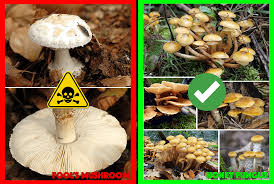

# 1. Problem Statement
 Goal : Mushrooms are a popular food choice around the world, but not all mushrooms are safe to eat. Some species are highly poisonous and can cause severe illness or death if consumed. Identifying edible and poisonous mushrooms based on their physical characteristics can be challenging, even for experts.

Use case :  we can use Machine Learning to build a model that can automatically predict whether a mushroom is edible or poisonous, based on its observable features.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Collection

In [ ]:
df=pd.read_csv('secondary_data.csv',sep=';')   #';' used for seperate columns by ;

print(df.head())

  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width stem-root  \
0               e          NaN          w        16.95       17.09         s   
1               e          NaN          w        17.99       18.19         s   
2               e          NaN          w        17.80       17.74         s   
3               e          NaN          w        15.77       15.98         s   
4               e          NaN          w        16.53       17.20         s   

  stem-surface stem-color veil-type veil-color has

In [ ]:
#calculate total rows

print(df.shape)

(61069, 21)


In [ ]:
#display all column without missing any one for that using 'None'

pd.set_option('display.max_columns',None)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


# EDA

In [ ]:
#To know type of columns data
df.dtypes

,0
class,object
cap-diameter,float64
cap-shape,object
cap-surface,object
cap-color,object
does-bruise-or-bleed,object
gill-attachment,object
gill-spacing,object
gill-color,object
stem-height,float64


In [ ]:
#summarize the important statistics of your DataFrame specifically numerical values
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


# 3. Data Cleaning

In [ ]:
#Remove any duplicate rows from my DataFrame and keep only unique ones
df=df.drop_duplicates()

df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
df.isnull().sum()  #shows sum of all null values in the dataset

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9855
gill-spacing,25062
gill-color,0
stem-height,0


In [ ]:
df.isnull().mean()*100    #gives you the fraction (or percentage if multiplied by 100) of missing values per column

,0
class,0.000000
cap-diameter,0.000000
cap-shape,0.000000
cap-surface,23.176797
cap-color,0.000000
does-bruise-or-bleed,0.000000
gill-attachment,16.176157
gill-spacing,41.137173
gill-color,0.000000
stem-height,0.000000


In [ ]:
#shows all the columns in the dataset
df.columns


Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [ ]:
#here droping columns having more null values
columns_to_drop=['stem-root','stem-surface','veil-type','veil-color','spore-print-color']
df.drop(columns=columns_to_drop,inplace=True)


In [ ]:
# here checking again after droping above columns
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,w,t,p,d,w


# Feaure Engineering

In [ ]:
#encoding categories into numerical values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns=['class','cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color',
         'stem-color','has-ring','ring-type','habitat','season']
for column in columns:
  encoded_values=le.fit_transform(df[column])
  df[column]=encoded_values
df.head()



,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,6,2,6,0,2,3,10,16.95,17.09,11,1,2,0,3
1,1,16.60,6,2,6,0,2,3,10,17.99,18.19,11,1,2,0,2
2,1,14.07,6,2,6,0,2,3,10,17.80,17.74,11,1,2,0,3
3,1,14.17,2,3,1,0,2,3,10,15.77,15.98,11,1,5,0,3
4,1,14.64,6,3,6,0,2,3,10,16.53,17.20,11,1,5,0,3


In [ ]:
#spliting x and y for test and training
from sklearn.model_selection import train_test_split
x=df.drop('class',axis=1)
y=df['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
correlation_matrix=df.corr()    #that calculates the pairwise correlation between all numeric columns in the dataset.

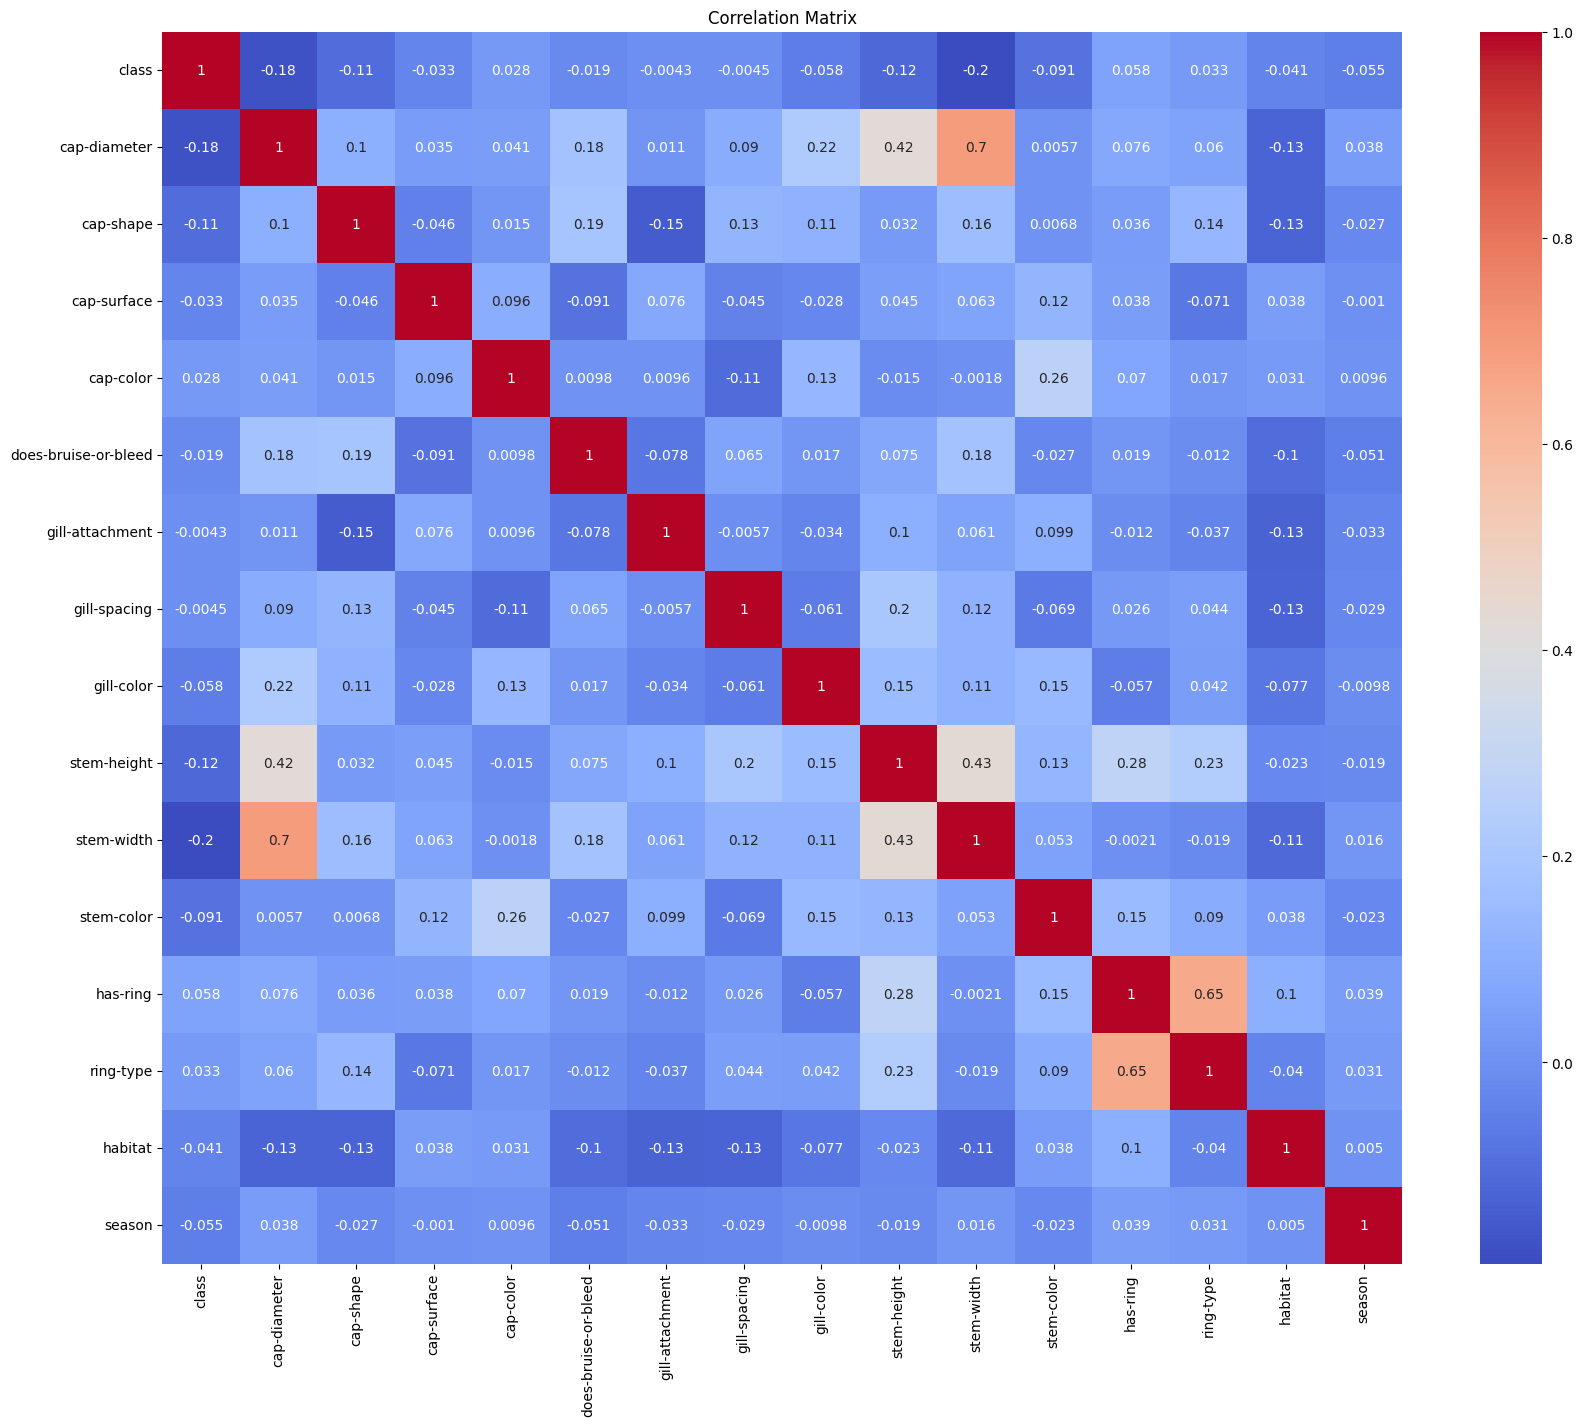

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()    #showing +1 having strong correlation

A table where:

Each row and column represents a numeric variable.

Each cell shows a correlation coefficient (a number between -1 and +1):

+1 → strong positive correlation (both increase together)

-1 → strong negative correlation (one increases, the other decreases)

0 → no linear relationship

Insights
---------

Strong Correlation
-----------------
cap-diameter ↔ stem-width: 0.70 (strong positive correlation) — larger caps tend to have thicker stems.

gill-color	Strong correlation (0.7+)	One of the strongest indicators — poisonous mushrooms often have darker gill colors (brown, black), while edible ones are lighter.


has-ring	Strong (0.6-0.7)	Presence or absence of a ring (annulus) is a major identifier — certain rings are highly indicative of poisonous mushrooms.

ring-type	Strong	Ring structure (flaring, large, pendant) plays a major role in class separation.

Moderate and Low
-----------------
cap-diameter ↔ stem-height: 0.42 (moderate positive correlation) — mushrooms with wider caps often have taller stems.

stem-height ↔ stem-width: 0.44 (moderate correlation) — thicker stems are somewhat associated with taller mushrooms.

gill-spacing and gill-Attchment -->-0.61(Moderate to low correlated)
based on the gill spacing and color are moderaltely correlated with quality of mushroom.

veil-type	Low	Most mushrooms have the same veil type, offering minimal predictive power.
veil-color	Moderate	Veil coloration can slightly differ across safe and poisonous types.

habitat	Moderate (0.4-0.5)	Certain mushrooms grow only in particular environments (woods, grasslands). Toxic types often grow on decaying matter.

season	Low to moderate	Seasonal appearance has mild correlation — some poisonous mushrooms bloom in specific months.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test,y_pred):
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.xticks([0.5,1.5],["Edible","Poisonous"])
  plt.yticks([0.5,1.5],['Edible','Poisonous'])
  plt.show()
  #A Confusion Matrix is a table used to evaluate the performance of a classification model (e.g., Logistic Regression, Decision Tree, Naive Bayes, etc.).

In [ ]:
from sklearn.metrics import classification_report
target_names=['Edible','Posisonus']


# Model Evaluation

# Decision Tree Classifiers

* Evaluating a Decision Tree classification model
* It’s an algorithm that splits data into branches based on feature values — like a “flowchart” — to make predictions.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# * A Confusion Matrix is a table used to evaluate the performance of a classification model
# * It compares the model’s predicted labels (y_pred) with the actual true labels (y_test)

              precision    recall  f1-score   support

      Edible       1.00      0.99      0.99      6733
   Posisonus       1.00      1.00      1.00      8498

    accuracy                           1.00     15231
   macro avg       1.00      1.00      1.00     15231
weighted avg       1.00      1.00      1.00     15231



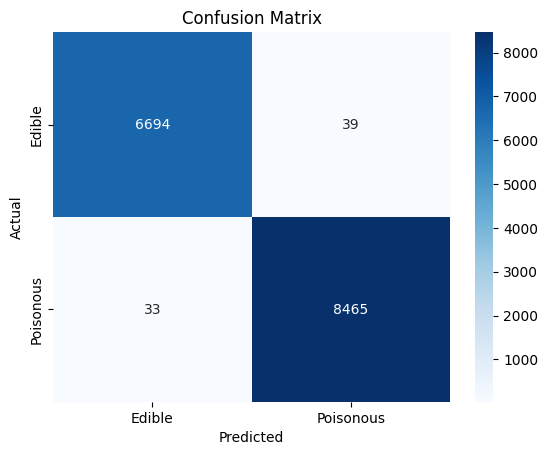

In [ ]:
classifier= DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)    # (x_test)actual labels from your test dataset
print(classification_report(y_test,y_pred,target_names=target_names))
plot_confusion_matrix(y_test,y_pred)   #(y_pred) -> labels your model predicted


Notes
------
what number means ⁉

6694 --> True Positive for edible
Actual=Edible, Predicted=Edible

39 --> False negative for Edible
Actual=Edible ,Predicted=poisonus
These are actualedible but your model predicted as Poisonus.

33 --> False positive Edible
Actual=Poisonus,Predicted=Edible

8465 --> True Negative for Poisonus
Actual=Poisonus,Predicted=Poisonus.






# Random Forest

a machine learning algorithm based on ensemble learning.
It builds many decision trees and combines their results to improve accuracy and reduce overfitting.

In [ ]:
#here using Random forest classifier used to find the classification matrics to evaluate the precsion and recall value to mushroom edible or not
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      6733
   Posisonus       1.00      1.00      1.00      8498

    accuracy                           1.00     15231
   macro avg       1.00      1.00      1.00     15231
weighted avg       1.00      1.00      1.00     15231



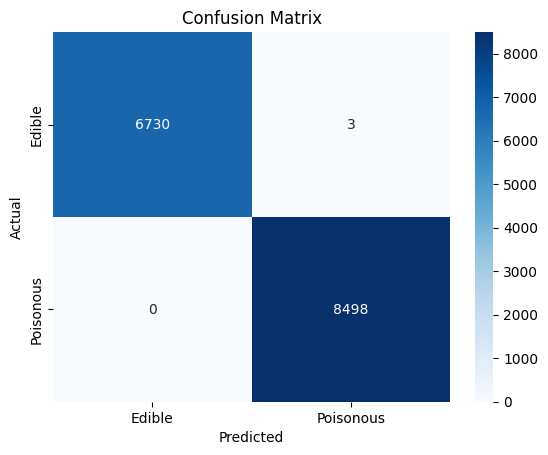

In [ ]:
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(x_train,y_train)
y_pred=rf_classifier.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
plot_confusion_matrix(y_test,y_pred)


what the number mean:
6730 -> True positive for edible
Actual=Edible,predicted=Edible

3-> False negative for edible
Actual=Edible,Predicted=Poisonus
These are mushroom that acually Edible but your model predicted as poisonus
0-> false Positive for Edible
Actual=poisonus, Predicted=Edible
Mushrooms that are poisonus but wrongly predicted as edible(your model didnt make this mistake at all)
8498 -> True Negative for Poisonus
Actual = Poisonus, Pdedicted= Poisonus.

Conclusion : Excellent for categorical data


# Logistic Regression
    * used for classification tasks (like yes/no, 0/1, or multi-class)
    * The model learns how features relate to the target class.

In [ ]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

      Edible       0.60      0.44      0.51      6733
   Posisonus       0.64      0.77      0.70      8498

    accuracy                           0.62     15231
   macro avg       0.62      0.61      0.60     15231
weighted avg       0.62      0.62      0.61     15231



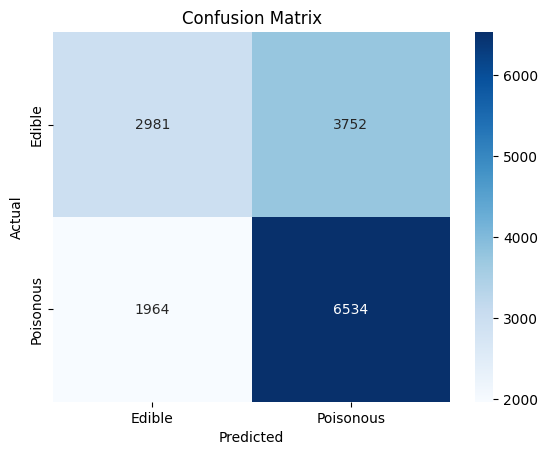

In [ ]:
logreg_classifier=LogisticRegression(max_iter=1000,random_state=42)
logreg_classifier.fit(x_train,y_train)
y_pred=logreg_classifier.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
plot_confusion_matrix(y_test,y_pred)


what number means ⁉

2981 -> True Positive for Edible
Actual= Edible ,Predictive = Edible

3752 -> false Negative for Edible
Actual = Edible ,Predicted = Poisionus

THese are mushroom that actually edible but your model predicted as Poisonus

1964 -> false Positive for edible
Actual = poisonus, Predicted=Edible
Mushroom that are poisonus but wrongly predicted as edible (your model didnt make mistake at all)

6534 -> True Positive for Poisonus
Actual=Poisoun,Predicted=Poisoun

conclusion : underfitting : The model is too simple and cant capture the pattern in the data.
* May drop due to non-linear data



# Naive Baye's
* It’s often used for continuous numerical data
* Naive Bayes means it assumes all features are independent of each other — this makes it simple and fast.

In [ ]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

      Edible       0.57      0.32      0.41      6733
   Posisonus       0.60      0.81      0.69      8498

    accuracy                           0.59     15231
   macro avg       0.58      0.56      0.55     15231
weighted avg       0.59      0.59      0.57     15231



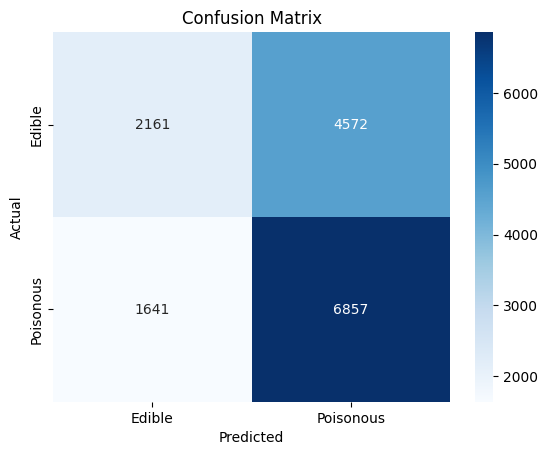

In [ ]:
nb_classifier=GaussianNB()
nb_classifier.fit(x_train,y_train)
y_pred=nb_classifier.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
plot_confusion_matrix(y_test,y_pred)

What number means:

2162 ->True Positive For Edible
Actual=Edible ,Predicted=Edible

4572 -> false Negative for Edible
Actual=Edible , Predicted=Poisonus

These are mushroom that actualy edible but your model predicted as poisonus

1641 -> False Positive for Edible
Actual = Poisonous, Predicted=Edible
Mushroom That are Poisnous but wrongly predicted as Edible
(your model didnt make mistake at all)

6857 -> True positive for poisonus
Actual= Poisonus, Predicted =Poisonus


# KNN
* a simple and intuitive classification algorithm.
* looks at the 5 nearest data points (neighbors) to make a prediction.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      6733
   Posisonus       1.00      1.00      1.00      8498

    accuracy                           1.00     15231
   macro avg       1.00      1.00      1.00     15231
weighted avg       1.00      1.00      1.00     15231



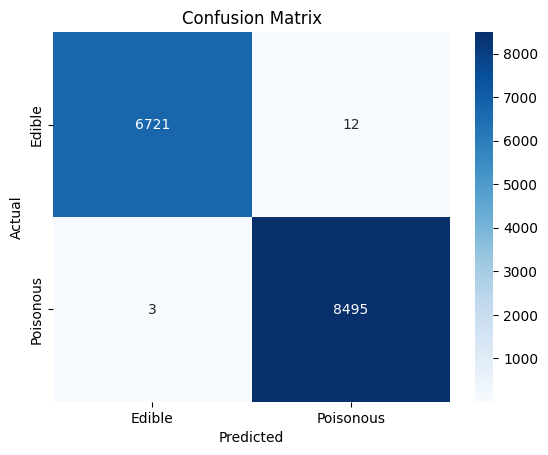

In [ ]:
knn_classifier=knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train,y_train)
y_pred=knn_classifier.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
plot_confusion_matrix(y_test,y_pred)

6721 -> True positive for Edible
Actual= Edible, Predicted=Edible
12 -> False Negative for Edible
Actual = Edible ,Predicted=Poisonus
These are mushrooms that actually Edible but your model predicted as Edible
3 -> False Positive for Edible
Actual= poisonus , Predicted = Edible.
Mushroom that are poisonus but wrongly predicted a edible (Your model didnt make mistake all)
8495 -> True Poisonus for Poisons.
Actual=Poisoun,Predicted=Poisonus

# Conclusion

* Decision Tree and Random Forest usually achieve near perfect accuracy for this dataset.

* Naïve Bayes is fast and fairly accurate.

* Logistic Regression might underperform slightly since the dataset is non-linear and categorical.

  The Decision Tree and Random Forest often perform best on this dataset because categorical features strongly determine whether a mushroom is edible or poisonous.